In [ ]:
pip install pandas nltk tqdm datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [ ]:
import pandas as pd
import re
import json
import nltk
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("wordnet")

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/MIT Academics/SEM-8/FINAL YEAR PROJECT/Dataset/cases.csv")  # Update with your actual file path
df = df.dropna()  # Remove missing values

# Display sample rows
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                  Case Name  \
0        State vs. John Doe   
1     People vs. Jane Smith   
2  Government vs. Raj Kumar   
3     District vs. Ali Khan   
4    City vs. Sarah Johnson   

                                               Input  \
0  John Doe, a prominent businessman, was accused...   
1  Jane Smith, a school teacher, was charged with...   
2  Raj Kumar was arrested for possession of illeg...   
3  Ali Khan, a local politician, was accused of m...   
4  Sarah Johnson, a daycare provider, was charged...   

                                              Output  Label  Count  \
0  The court found John Doe guilty of caste discr...      1    543   
1  Jane Smith was sentenced to 5 years in prison ...      1    789   
2  Raj Kumar was convicted and sentenced to 3 yea...      1    456   
3  The court ruled in favor of the complainant an...      1    678   
4  Sarah Johnson was found guilty and sentenced t...      1    345   

   Decision_Count  
0              12  
1              

In [ ]:
def extract_decision_reason(output_text):
    match = re.match(r"(\d)\[ds\](.+)", str(output_text))
    if match:
        label = int(match.group(1))  # Extract 0 or 1
        reason_text = match.group(2).strip()  # Extract reasoning
    else:
        label = None
        reason_text = None
    return label, reason_text

# Apply extraction
df["Label"], df["Decision_Reasoning"] = zip(*df["Output"].apply(extract_decision_reason))

# Drop original Output column (as Label & Decision_Reasoning are now extracted)
df.drop(columns=["Output"], inplace=True)

print(df.head())  # Check extracted data

                  Case Name  \
0        State vs. John Doe   
1     People vs. Jane Smith   
2  Government vs. Raj Kumar   
3     District vs. Ali Khan   
4    City vs. Sarah Johnson   

                                               Input Label  Count  \
0  John Doe, a prominent businessman, was accused...  None    543   
1  Jane Smith, a school teacher, was charged with...  None    789   
2  Raj Kumar was arrested for possession of illeg...  None    456   
3  Ali Khan, a local politician, was accused of m...  None    678   
4  Sarah Johnson, a daycare provider, was charged...  None    345   

   Decision_Count Decision_Reasoning  
0              12               None  
1              23               None  
2              15               None  
3              18               None  
4              11               None  


In [ ]:
# Initialize Lemmatizer & Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenize words
    tokens = word_tokenize(text)

    # Remove stopwords & apply lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join back to string
    return " ".join(cleaned_tokens)

# Apply text cleaning
tqdm.pandas()  # Progress bar for applying functions
df["Cleaned_Input"] = df["Input"].progress_apply(clean_text)
df["Cleaned_Reasoning"] = df["Decision_Reasoning"].progress_apply(clean_text)

# Drop original Input column (keeping cleaned versions)
df.drop(columns=["Input", "Decision_Reasoning"], inplace=True)

print(df.head())  # Check cleaned data

100%|██████████| 10/10 [00:00<00:00, 17719.92it/s]

                  Case Name Label  Count  Decision_Count  \
0        State vs. John Doe  None    543              12   
1     People vs. Jane Smith  None    789              23   
2  Government vs. Raj Kumar  None    456              15   
3     District vs. Ali Khan  None    678              18   
4    City vs. Sarah Johnson  None    345              11   

                                       Cleaned_Input Cleaned_Reasoning  
0  john doe prominent businessman accused discrim...                    
1  jane smith school teacher charged sexually ass...                    
2  raj kumar arrested possession illegal narcotic...                    
3  ali khan local politician accused making derog...                    
4  sarah johnson daycare provider charged abusing...                    


In [ ]:
# Save as CSV
df.to_csv("preprocessed_cases.csv", index=False)

# Save as JSON
df.to_json("preprocessed_cases.json", orient="records", indent=4)

print("✅ Preprocessed data saved successfully!")

✅ Preprocessed data saved successfully!


## Changing to GPU

In [ ]:
import pandas as pd

# Load preprocessed dataset
df = pd.read_csv("preprocessed_cases.csv")  # Update with actual file path

# Extract input texts and labels
texts = df["Cleaned_Input"].tolist()  # Processed case details
labels = df["Label"].tolist()  # Outcome labels (0 or 1)

print(f"Total cases: {len(texts)}")
print(f"Sample input: {texts[0]}")

Total cases: 10
Sample input: john doe prominent businessman accused discriminating member scst community denying access public facility complainant alleged john doe refused entry community hall citing castebased reason case gained significant medium attention due highprofile nature defendant


In [ ]:
import torch
from transformers import AutoTokenizer

# Load Longformer tokenizer
longformer_tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096")

# Tokenize function
def tokenize_text(text):
    return longformer_tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=4096,
        return_tensors="pt"
    )

# Tokenize all inputs
tokenized_texts = [tokenize_text(text) for text in texts]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModel

# Load pretrained Longformer model
longformer_model = AutoModel.from_pretrained("allenai/longformer-base-4096")
longformer_model.eval()  # Set to evaluation mode

# Function to extract embeddings
def extract_embeddings(tokenized_input):
    with torch.no_grad():  # Disable gradient computation
        output = longformer_model(**tokenized_input)
    return output.last_hidden_state.mean(dim=1)  # Pooling to get a fixed-size vector

# Extract embeddings for all cases
embeddings = [extract_embeddings(t) for t in tokenized_texts]

# Convert to tensor
embeddings_tensor = torch.cat(embeddings, dim=0)
labels_tensor = torch.tensor(labels)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/597M [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split

# Convert embeddings to NumPy for splitting
embeddings_np = embeddings_tensor.numpy()
labels_np = labels_tensor.numpy()

# Split into train (80%) and validation (20%)
train_embeddings, val_embeddings, train_labels, val_labels = train_test_split(
    embeddings_np, labels_np, test_size=0.2, random_state=42
)

# Convert back to tensors
train_embeddings_tensor = torch.tensor(train_embeddings)
val_embeddings_tensor = torch.tensor(val_embeddings)
train_labels_tensor = torch.tensor(train_labels)
val_labels_tensor = torch.tensor(val_labels)

In [ ]:
from datasets import Dataset
import numpy as np

# Convert tensors to NumPy arrays (if not already)
train_embeddings_np = train_embeddings_tensor.numpy()
val_embeddings_np = val_embeddings_tensor.numpy()
train_labels_np = train_labels_tensor.numpy()
val_labels_np = val_labels_tensor.numpy()

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_dict({
    "input_embeds": train_embeddings_np.tolist(),
    "labels": train_labels_np.tolist(),
})

val_dataset = Dataset.from_dict({
    "input_embeds": val_embeddings_np.tolist(),
    "labels": val_labels_np.tolist(),
})


In [ ]:
from transformers.trainer import Trainer
from transformers.models.auto.modeling_auto import AutoModelForSequenceClassification

class CustomLegalBERT(torch.nn.Module):
    def __init__(self, legalbert_model):
        super().__init__()
        self.legalbert = legalbert_model
        self.dense = torch.nn.Linear(768, 2)  # 768 → 2 (binary classification)

    def forward(self, input_embeds, labels=None):
        logits = self.dense(input_embeds)
        loss = None
        if labels is not None:
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# Load LegalBERT and wrap it
legalbert_model = AutoModelForSequenceClassification.from_pretrained("nlpaueb/legal-bert-base-uncased", num_labels=2)
custom_model = CustomLegalBERT(legalbert_model)


config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./legalbert-finetuned",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=custom_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

In [ ]:
# Save model and tokenizer
model_path = "./legalbert-finetuned"
custom_model.legalbert.save_pretrained(model_path)
longformer_tokenizer.save_pretrained(model_path)

('./legalbert-finetuned/tokenizer_config.json',
 './legalbert-finetuned/special_tokens_map.json',
 './legalbert-finetuned/vocab.json',
 './legalbert-finetuned/merges.txt',
 './legalbert-finetuned/added_tokens.json',
 './legalbert-finetuned/tokenizer.json')

# Testing

In [ ]:
# Initialize Lemmatizer & Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_row(row):
    """
    Preprocess a single row in the dataset:
    - Extracts decision reasoning from Output
    - Cleans text (removes special characters, lemmatization, stopwords)
    - Optionally includes Case Name in input
    """

    # Extract Label & Decision Reasoning from Output
    match = re.match(r"(\d)\[ds\](.+)", str(row["Output"]))
    if match:
        label = int(match.group(1))  # Extract label (0 or 1)
        reasoning_text = match.group(2).strip()  # Extract decision reasoning
    else:
        label = None
        reasoning_text = ""

    def clean_text(text):
        """Normalize text: remove special characters, stopwords, apply lemmatization."""
        if pd.isna(text):
            return ""

        text = text.lower()  # Convert to lowercase
        text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
        tokens = word_tokenize(text)  # Tokenize text
        cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return " ".join(cleaned_tokens)

    # Clean Input & Reasoning
    cleaned_input = clean_text(row["Input"])
    cleaned_reasoning = clean_text(reasoning_text)

    # Concatenate Case Name (optional)
    final_input = f"{row['Case Name']} {cleaned_input}"

    # Return preprocessed row as dictionary
    return {
        "Case Name": row["Case Name"],
        "Final_Input": final_input,
        "Cleaned_Reasoning": cleaned_reasoning,
        "Label": label
    }


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/MIT Academics/SEM-8/FINAL YEAR PROJECT/Dataset/Predex_Dataset/test.csv").head(100)  # Replace with your test CSV

# Apply preprocessing function to all rows
tqdm.pandas()  # Enable progress bar
processed_test_df = test_df.progress_apply(preprocess_row, axis=1, result_type="expand")

print("✅ Preprocessing completed and saved!")

100%|██████████| 100/100 [00:04<00:00, 23.92it/s]

✅ Preprocessing completed and saved!


In [ ]:
# Tokenize test cases (same as training step)
tokenized_test_texts = [tokenize_text(text) for text in processed_test_df["Input"]]

# Extract Longformer embeddings for test cases
test_embeddings = [extract_embeddings(t) for t in tokenized_test_texts]

# Convert to tensor
test_embeddings_tensor = torch.cat(test_embeddings, dim=0)

test_dataset = Dataset.from_dict({
    "input_embeds": test_embeddings_tensor.numpy().tolist(),
})


In [ ]:
processed_test_df

,Case Name,Final_Input,Cleaned_Reasoning,Label
0,State Of Madhya Pradesh &amp; Ors Vs. Seth Bal...,State Of Madhya Pradesh &amp; Ors Vs. Seth Bal...,inclined agree view expressed high court two q...,0
1,"Commissioner Of Income-Tax, Kerala And Coimbat...","Commissioner Of Income-Tax, Kerala And Coimbat...",interpretation act possible hold amount paid s...,0
2,Imperial Tobacco Company of India Ltd Vs. Its ...,Imperial Tobacco Company of India Ltd Vs. Its ...,doubt case inquiry conducted manner required s...,0
3,ZENITH DRUGS &amp; ALLIED AGENCIES PVT. LTD. R...,ZENITH DRUGS &amp; ALLIED AGENCIES PVT. LTD. R...,reading term compromise deed dated clear party...,1
4,PRAMOD KUMAR SINGH AND ORS Vs. STATE OF UTTAR ...,PRAMOD KUMAR SINGH AND ORS Vs. STATE OF UTTAR ...,process adopted state government discernable a...,0
...,...,...,...,...
95,M/S Laxmi Dyechem Vs. State Of Gujarat,M/S Laxmi Dyechem Vs. State Of Gujarat t thaku...,manifest dishonour would constitute offence ch...,1
96,Krishna Gopal Kakani Vs. Bank Of Baroda,Krishna Gopal Kakani Vs. Bank Of Baroda harjit...,opinion appellant plea ignorance clearly unten...,0
97,Lachhman Dass &amp; Ors Vs. Municipal Committe...,Lachhman Dass &amp; Ors Vs. Municipal Committe...,view section b violates provision article doub...,0
98,Kamru Mian Alias Kamru Hassan and Others Vs. S...,Kamru Mian Alias Kamru Hassan and Others Vs. S...,mr murddin learned counsel appellant usual fai...,0


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load model and tokenizer
model_path = "./legalbert-finetuned"
loaded_model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Set model to evaluation mode
loaded_model.eval()

print("✅ Model Loaded Successfully!")


✅ Model Loaded Successfully!


In [ ]:
# Tokenize test inputs
tokenized_test = tokenizer(
    processed_test_df["Final_Input"].tolist(),
    padding=True,
    truncation=True,
    max_length=4096,  # Adjust based on Longformer/LegalBERT input limit
    return_tensors="pt"
)

# Move tokenized inputs to device
tokenized_test = {key: val.to(device) for key, val in tokenized_test.items()}

# Store true labels
true_labels = processed_test_df["Label"].tolist()


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load LegalBERT model and tokenizer
model_path = "./legalbert-finetuned"
legalbert_tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
legalbert_model = AutoModelForSequenceClassification.from_pretrained(model_path)

legalbert_model.eval()  # Set to evaluation mode

def predict_case_outcome(text):
    # Tokenize input using LegalBERT tokenizer (Max: 512 tokens)
    inputs = legalbert_tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=512,  # LegalBERT constraint
        return_tensors="pt"
    )

    # Get model predictions
    with torch.no_grad():
        outputs = legalbert_model(**inputs)

    # Get probabilities
    logits = outputs.logits
    probs = torch.nn.functional.softmax(logits, dim=-1)
    prediction = torch.argmax(probs, dim=-1).item()

    return prediction, probs.tolist()

# Test with a sample input
sample_text = """
Deepak Gupta, J.1. Leave granted.1. As common questions of law and facts are involved in these civil appeals, they are being disposed of by this common Judgment.2. The relevant facts are that, by a Conveyance Deed dated 25.08.1900, one Lancelot Ricketts sold his property known as "Beaulieu" measuring 24 acres and 12 gunthas situated in Bengaluru. This conveyance deed was executed in favour of the Dewan of Mysore. It is not disputed that thereafter, on various occasions, portions of this Estate were acquired by the erstwhile State of Mysore, both before and after independence.3. This "Beaulieu" Estate is apparently located in the heart of Bengaluru city. It appears that the Office of the Karnataka Public Service Commission had a boundary adjoining "Beaulieu" estate in which a hotel under the name of Atria was being run. There were a number of other commercial buildings and residences, including the residence of appellant M. Shankaranarayanan in this estate.4. A complaint was sent by the Secretary of the Karnataka Public Service Commission on 14.05.2004 that, in the year 1900, the property had been transferred by the original owner Lancelot Ricketts in favour of the Dewan of Mysore. However, it was fraudulently shown that the property had actually been purchased for the First Princess of Mysore out of her personal funds. It was alleged that the original conveyance deed dated 25.08.1900 had been executed only in favour of the Dewan of Mysore. Furthermore, no stamp duty was paid on the sale deed and, therefore, it was complained that the sale was either totally illegal or that the sale was in favour of the State of Mysore and "Beaulieu" estate was not the personal property of the First Princess. In the same complaint, it was also mentioned that, in the year 1956, the Government of Mysore acquired 6 acres of "Beaulieu" estate and, in those proceedings, Rajkumari Leelavathi Devi was notified as the owner of the estate. In the year 1959, some other portions of the estate were acquired and this time K. Basavaraj Urs was shown as the owner. It was complained that the acquisition of 20 acres and 9 gunthas of land, out of the 24 acres and 12 gunthas, was a fraudulent acquisition and would not confer any rights upon the owners.5. As a result of this complaint, summary proceedings under Section 67 of the Karnataka Land Revenue Act, 1964 (for short `the KLR Act) were initiated against the occupants of the land. Aggrieved by this action, one of the parties - Smt. Asha Chakko, who is appellant in Civil Appeal No. 4939 of 2017 [arising out of SLP (C) No. 12595 of 2014] filed a writ petition before the Karnataka High Court, whereas the other parties filed appeals before the Appellate Tribunal. The learned Single Judge quashed the order passed by the State of Karnataka on the ground that the State had no jurisdiction to pass the same.6. The State of Karnataka preferred an appeal against the judgment of the learned Single Judge before the Division Bench of the High Court. The appellant M. Sankaranarayanan applied for transfer of his appeal, which had been filed before the Appellate Tribunal, to the High Court. This prayer was rejected by the Karnataka High Court. Thereafter, the appellant approached this Court in SLP (C) No. 25034 of 2011 for transfer of his case. This petition was allowed and the operative portion of the order reads as follows:"3. The appellant applied to the High Court for transfer of Appeal No. 690 of 2005, titled as M. Sankaranarayanan v. Deputy Commissioner and others: filed by him before the Karnataka Appellate Tribunal (KAT) to the High Court for hearing the same along with Writ Appeal No. 643 of 2009. The High Court dismissed the application. While dismissing the application, the High Court observed that the appeal pending before the KAT has to be heard and decided by the Tribunal itself and it cannot be clubbed with the writ appeal.4. Having regard to the fact that the controversy in Writ Appeal No. 643 of 2009, which is pending before the High Court, is broadly identical to the appeal which has been preferred by the appellant before KAT, we are of the view that the High Court failed to exercise the jurisdiction vested in it by transferring the appeal pending before the KAT to itself to avoid multiplicity of arguments as well as the conflict of judgments.5. We, accordingly, allow the appeal and direct that the Appeal No. 690 of 2005, titled as "M. Sankaranarayanan v. Dy. Commissioner, Bangalore and others" pending before the KAT be transferred to the High Court for its hearing and disposal along with Writ Appeal No. 643 of 2009, titled as "State of Karnataka and another v. Asha Chakko and others". The Registrar, KAT shall transfer the record and proceedings of Appeal No. 690 of 2005 to the High Court as expeditiously as may be possible and not later than four weeks from the date of receipt of copy of this order. No costs."The writ appeal filed by the State of Karnataka in the case of Smt. Asha Chakko was allowed mainly on the ground that the writ petition was not maintainable, since the petitioner had an efficacious alternative remedy of approaching the Tribunal. As far as transferred appeal of appellant M. Sankaranarayanan is concerned, the High Court held that since the appeal had been filed before the Tribunal, it would be proper to remit it back to the Tribunal for decision. Aggrieved by the judgment of the learned Division Bench, these two appeals have been filed.7. We have heard Shri K.K. Venugopal, learned Senior Counsel for the appellants and Shri J.N. Raghupathy, learned Counsel for the State of Karnataka, at length. The main contention of Shri Venugopal is that this is a case where the action of the State Government is hopelessly time-barred. The acquisition took place in 1900 and the State Government could not have issued notices after more than 100 years claiming that the property belonged to the State of Karnataka. It is further submitted that the very basis of the complaint is false because a careful consideration of the sale deed of 1900 clearly shows that this was a sale deed which is executed in favour of the First Princess. The second contention is that the State had no jurisdiction to initiate proceeding under Section 67 of the KLR Act.8. At this stage, it would be appropriate to refer to the original conveyance deed itself. No doubt, the conveyance deed shows that it had been executed to the Dewan of Mysore by Lancelot Ricketts, however, at the bottom of the conveyance deed, there is a note that the same has been registered and a fee of Rs. 128.50 had been paid. There is a memo on record which has been produced from the Archives of the State and this shows that the Dewan of Mysore put up a memo before the Maharaja of Mysore. In this memo, it is stated that, as desired by His Highness, the Dewan of Mysore had arranged to purchase Mr. Lancelot Rickettss house for the First Princess Jayalakshammanni Avaru. There are details of the account of the First Princess, cash balance and pension due to her and how the money for purchase of this house was to be appropriated out of the funds of the First Princess. This memo was put up on 03.08.1990 and approved on 04.08.1990. It would be apposite to mention that, on the side of this memo, there is a note that His Highness before conveying approval may explain the matter to and secure the clearance of the First Princess. This was done and approval given on 04.08.1990, where-after the conveyance deed was executed on 25.08.1900.9. The matter does not end here. As mentioned hereinabove, the total area was 24 acres and 12 gunthas. In the year 1918-19, correspondence was exchanged between the Government of Mysore and the Controller of Palace of Mysore with regard to some encroachment upon the land of the First Princess. Finally, the Government agreed to pay compensation of Rs. 2,300/- for the same to the First Princess. Again in 1948 it appears that the State wanted to acquire some portion of the estate. On 11.12.1948, a letter was written by the Huzur Secretary to the Government of Mysore that since the land was part of "Beaulieu" estate which belonged to the First Princess, all correspondence for acquisition of the same be addressed to her. On 06.08.1949, 12680 square yards, out of `Beaulieu estate were acquired for a sum of Rs. 1,95,000/- and the compensation was paid to the First Princess.10. It would be pertinent to mention that the First Princess married one Sri Kantharaje Urs in the year 1918 and they had a daughter Smt. Leelavathi Devi. Smt. Leelavathi Devi became the owner of "Beaulieu" estate after the death of her parents and, after her death, her husband K. Basavaraj Urs succeeded to the property.11. On 02.08.1956, the Government of Mysore acquired another piece of land and, again, the compensation was paid to Rajkumari Leelavathi Devi, the daughter of the First Princess. Another portion of "Beaulieu" estate was acquired in the year 1959 and compensation was paid to K. Basavaraj Urs.12. As Rajkumari Leelavathi Devi and K. Basavaraj Urs had no children of their own, they had adopted one K.B. Ramachandraraj Urs, who became the owner of the property after the death of his parents. He executed a sale deed in favour of the appellant M. Sankaranarayanan on 12.12.1973. The entry in the Revenue Record was also made in 1973.13. As far as the case of Smt. Asha Chakko is concerned, K.B. Ramachandraraj Urs sold a portion of the property to Smt. M. Meenakshi Amma vide sale deed dated 15.04.1971. M. Meenakshi Amma, thereafter, executed a will in favour of Dr. Ammu Nair, who was recorded as owner of that portion of the property. Dr. Ammu Nair willed the property in favour of Asha Chakko, Nikhilanand Nair and Nityanand N. Nair.14. After the complaint dated 14.05.2004, the Government of Karnataka issued a notice under Section 67(2) of the KLR Act. Asha Chakko, Nikhilanand Nair and Nityanand N. Nair filed a writ petition before the High Court challenging the notice and the learned Single Judge of the High Court vide order dated 05.02.2009 passed in W.P. No. 16974 of 2005 allowed the writ petition in the following terms:"24. Having regard to the admitted circumstances in the present case, where the properties originally sold in the year 1900 by Shri. Lancelot Ricketts has been divided and sub divided and sold to several parties over the years by various individual and a portion of which has been acquired by the petitioners, under registered documents, apart from compulsory acquisition proceedings in respect of other portions of the property whereby the government itself has consistently acknowledged the ownership of individual, they cannot be ousted by recourse to section 67. This would be so even on the principal, that fraud would vitiate all.25. Reliance sought to be placed on the judgment of the Division Bench of this court in respect of land granted by the Government for temporary cultivation and subsequent alienation by the grantees in favour of the appellants, in that case, had only resulted in enquiries having been conducted and entries made in the revenue records in favour of the appellants having been rounded off and the name of the Government having been substituted. The dispute as regards title, was not adjudicated and any observations as regards title were held to be inconsequential. The said judgment would not be relevant to the facts of the present case.26. Further, Section 67(2) does not provide for an order of eviction being passed. In the light of section 67(3) providing for time, to a claimant in respect of any Government property, of one year, the impugned order directing that the respondents be evicted and that they hand over the property in their possession to the Government within 21 days of service of the order is also without jurisdiction."It was held that the authority could not have come to the conclusion that the deed of conveyance executed on 25.08.1900 was fraudulently claimed by Lancelot Ricketts in favour of the First Princess. It was also held that no presumption could be raised that the erstwhile royal family had sought to play fraud and, therefore, the learned Single Judge quashed the entire proceedings. As we have already mentioned above, the State of Karnataka filed an appeal and that appeal has been allowed only on the ground that the proper remedy for the writ petitioner(s) was to approach the Appellate Tribunal.15. Section 67 of the KLR Act reads as follows:"67. Public roads, etc., and all lands which are not the property of others belong to the Government.- (1) All public roads, streets, lanes and paths, bridges, ditches, dikes and fences, on or beside the same, the bed of the sea and of harbours and creeks below high water mark and of rivers, streams, nallas, lakes and tanks and all canals and water-courses and all standing and flowing waters, and all lands wherever situated which are not the property of individuals or of aggregate of persons legally capable of holding property, and except in so far as any rights of such persons may be established, in or over the same, and except as may be otherwise provided in any law for the time being in force, are and are hereby declared to be with all rights in or over the same or appertaining thereto, the property of the State Government.Explanation.- In this section, "high water mark" means the highest point reached by ordinary spring tides at any season of the year.(2) Where any property or any right in or over any property is claimed by or on behalf of the State Government or by any person as against the State Government, it shall be lawful for the Deputy Commissioner or a Survey Officer not lower in rank than a Deputy Commissioner, after formal inquiry to pass an order deciding the claim.(3) Any person aggrieved by an order made under sub-section (2) or in appeal or revision therefrom may institute a civil suit contesting the order within a period of one year from the date of such order and the final decision in the civil suit shall be binding on the parties."A bare reading of the section shows that public roads, streets, lanes etc., and all lands which are not the properties of others, belong to the Government. Where the property is recorded in the ownership of any other person or persons who are legally capable of holding property, the provisions of Section 67 will not apply. Section 67 cannot be used to dispute the title of persons who have been holding property for more than 100 years. Prior to the conveyance deed being executed on 25.08.1900, the Dewan of Mysore had put up a note to His Highness the Maharaja of Mysore that the estate property is being bought for the First Princess and the payment was to be made out of her personal funds. He had also requested the Maharaja to apprise the First Princess about the facts and then obtain her approval. It is not believable that, in the year 1900, the Maharaja of Mysore and his Dewan colluded to commit fraud on the State of Mysore with a view to favour the First Princess.16. As is clear from the facts narrated above, various acquisitions took place out of "Beaulieu" estate. More than 20 acres of the total 24 acres and 12 gunthas were acquired by the Government of Mysore both prior to and after the independence of the country. Nobody raised any objection. If the land belonged to the State, why would the State acquire its own property? This question has not been answered. Various transactions have taken place after the year 1971 and portions of this estate have been sold/transferred from one person to another. Entries in the Revenue Record were made, but the State never raised any objection. The sale deeds were registered without demur. It was only in the year 2004 that some official of the Karnataka Public Service Commission filed a complaint in this regard. In the meantime, hotels, commercial buildings and residences had come up on various portions of the estate.17. After 104 years of the execution of the original conveyance deed, and after acquiring various lands out of this very estate, we cannot permit the State to urge that the original conveyance deed is fraudulent or that the subsequent transfers are all collusive and, as such, void. There are many bona fide purchasers and, even otherwise, we are not inclined to hold that the original transaction was invalid.18. Furthermore, a bare perusal of Section 67 clearly indicates that it only applies to public roads, streets, lanes etc. or to such lands which are not the property of individuals, or an aggregate of persons legally capable of holding property. A dispute of title of property between the State and individuals cannot be decided in terms of Section 67. Merely because the Secretary of the Karnataka Public Service Commission had, in his complaint, opined that the deed of conveyance executed more than 100 years back was fraudulently claimed to be in favour of the First Princess, was not sufficient ground to proceed under Section 67. It could not be held that all subsequent transactions relating to the estate property were fraudulent. Fraud must be pleaded and proved; it cannot be presumed. Therefore, we are of the view that the learned Single Judge was justified in holding that the proceedings under Section 67 were without jurisdiction. We are also of the view that the proceedings are beyond the period of limitation.19. The Division Bench of the High Court held that, in terms of Section 67, the aggrieved parties can file either a civil suit or an appeal against the order before the Karnataka Appellate Tribunal under Section 49 of the KLR Act. It did not decide the claim on merits. In the peculiar facts and circumstances of the present case, where the dispute regarding title has been raised after more than 100 years and when there is evidence to show that the land was bought for the benefit of First Princess, the allegation of fraud cannot be believed, especially in view of the contemporaneous evidence and the subsequent acquisitions out of this very estate, both by the Maharaja of Mysore before independence and by the State of Mysore after independence. The notice being without jurisdiction could be quashed in proceedings under Article 227 of the Constitution of India.20. In view of the above discussion, we are clearly of the view that the Division Bench of the High Court erred in setting aside the judgment of the learned Single Judge. It is held that the "Beaulieu" estate was purchased by the Dewan of Mysore on behalf of the First Princess and the consideration was paid from the personal funds of First Princess.
"""


pred_label, prob_dist = predict_case_outcome(sample_text)
print(f"Predicted Outcome: {pred_label}, Probabilities: {prob_dist}")


Predicted Outcome: 1, Probabilities: [[0.30826929211616516, 0.6917307376861572]]


In [ ]:
# Extract inputs and labels from the test dataset
test_texts = processed_test_df["Final_Input"].tolist()
true_labels = processed_test_df["Label"].tolist()

In [ ]:
def predict_case_outcome(text):
    # Tokenize using LegalBERT tokenizer (max 512 tokens)
    inputs = legalbert_tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )

    # Get model predictions
    with torch.no_grad():
        outputs = legalbert_model(**inputs)

    # Get probabilities and predicted label
    logits = outputs.logits
    probs = torch.nn.functional.softmax(logits, dim=-1)  # Convert to probabilities
    prediction = torch.argmax(probs, dim=-1).item()  # Get class (0 or 1)

    return prediction, probs.tolist()


In [ ]:
predicted_labels = []
probabilities = []

# Iterate over test cases
for text in test_texts:
    pred, probs = predict_case_outcome(text)
    predicted_labels.append(pred)
    # Check if probs has more than one element before accessing index 1
    probabilities.append(probs[0][1] if len(probs[0]) > 1 else probs[0][0])

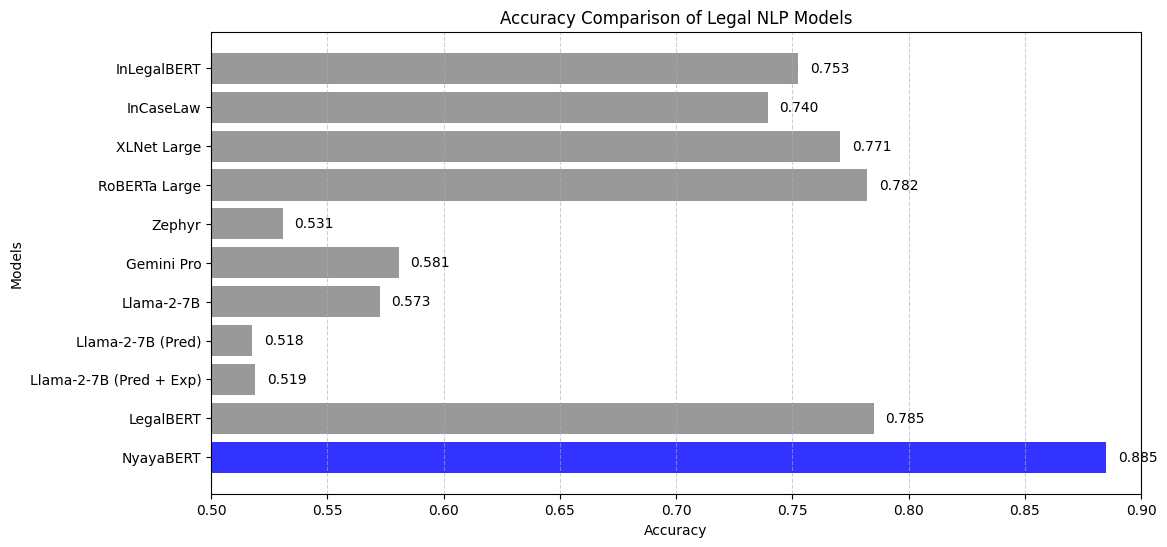

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Model names
models = [
    "InLegalBERT", "InCaseLaw", "XLNet Large", "RoBERTa Large",
    "Zephyr", "Gemini Pro", "Llama-2-7B", "Llama-2-7B (Pred)",
    "Llama-2-7B (Pred + Exp)", "LegalBERT", "NyayaBERT"
]

# Compute accuracy
actual_accuracy = accuracy_score(true_labels, predicted_labels)

# Accuracy values (LegalBERT is added, NyayaBERT is our fine-tuned model)
accuracies = [
    0.7526, 0.7395, 0.7707, 0.7822,  # Existing models
    0.5309, 0.5808, 0.5726, 0.5177,  #  Existing models
    0.5190, 0.7850, actual_accuracy  # LegalBERT (added) and NyayaBERT (fine-tuned)
]

# Highlight NyayaBERT
colors = ['gray'] * (len(models) - 1) + ['blue']

plt.figure(figsize=(12, 6))
plt.barh(models, accuracies, color=colors, alpha=0.8)
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Accuracy Comparison of Legal NLP Models")
plt.xlim(0.5, 0.9)

# Annotate values
for i, v in enumerate(accuracies):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert Y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Save the plot
plt.savefig("NyayaBERT_Comparison.png")
plt.show()